#### Assignment Title: Data Analytics for Haqdarshak's YojanaCard - Understanding Demographic Needs

* Objective: The objective of this assignment is to analyse secondary data related to bank offerings and income/expenditure of a specific demographic group. This analysis will help Haqdarshak in designing the YojanaCard and adding specific offerings that align with the needs of this demographic.

### <span style='color:purple'> Required Libraries </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Part 1<span style='color:purple'>|</span> Data Collection and Preprocessing

### <span style='color:purple'> 1.1 Data Collection </span>

In [2]:
bank_survey = pd.read_csv('Bank Survey Responses.csv')
demography_data = pd.read_csv('DemographyPrimaryData.csv')
ie_demography = pd.read_csv('Income expenditure demography.csv')

#How big data is
print("Bank survey responses data shape :", bank_survey.shape)
print("Demography primary data shape :", demography_data.shape)
print("Income expenditure demography data shape :", ie_demography.shape)

Bank survey responses data shape : (100, 45)
Demography primary data shape : (1350, 40)
Income expenditure demography data shape : (1080, 14)


### <span style='color:purple'> 1.2 Data Preprocessing </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📃 &nbsp;<b>Bank Survey Responses</b><br>
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>How does the data look like?</b><br>
</div>

In [4]:
bank_survey.head()

,Time,Gender,Education,Location,Profession,Monthly Income,Do you have bank account,which of the following bank are you using?,Status of usage,Which attributes of the bank you like the most? [Quality of service],...,security [protection of banking transaction],security [privacy/confidentiality of the bank],security [care in collection of personal information],customer service [customer friendly environment in bank],customer service [customer feedback service],customer service [special service for elders and disabled],customer service [Are you satisfied with service of the bank ],At what level your satisfaction with the following services quality dimension? [Location of bank],At what level your satisfaction with the following services quality dimension? [sufficient number of ATM machines],At what level your satisfaction with the following services quality dimension? [Employees approach in solving problems]
0,04-07-2019 15:17,male,Illiterate,Bangalore,Plumber,2,yes,SBI,1-5 years,2,...,3,4,4,5,5,5,3,0,0,0
1,04-07-2019 15:26,Female,Primary,Kochi,Lawyer,2,yes,BOB,5-10 years,2,...,2,2,4,4,4,4,2,4,1,5
2,4/7/2019 15.45.23,male,Post graduation,Kolkata,Production Engineer,0,yes,SBI,1-5 years,2,...,2,2,2,3,4,4,3,2,3,5
3,04-07-2019 16:00,male,Graduation,Kolkata,Business,0,yes,BOB,1-5 years,2,...,2,2,2,2,3,4,2,1,2,2
4,04-07-2019 16:08,male,Graduation,Bangalore,Mechanic,2,yes,SBI,5-10 years,4,...,3,3,3,3,3,3,3,3,3,3


In [5]:
bank_survey.sample()

,Time,Gender,Education,Location,Profession,Monthly Income,Do you have bank account,which of the following bank are you using?,Status of usage,Which attributes of the bank you like the most? [Quality of service],...,security [protection of banking transaction],security [privacy/confidentiality of the bank],security [care in collection of personal information],customer service [customer friendly environment in bank],customer service [customer feedback service],customer service [special service for elders and disabled],customer service [Are you satisfied with service of the bank ],At what level your satisfaction with the following services quality dimension? [Location of bank],At what level your satisfaction with the following services quality dimension? [sufficient number of ATM machines],At what level your satisfaction with the following services quality dimension? [Employees approach in solving problems]
43,4/15/2019 0:36:11,male,Graduation,Mumbai,Software Developer,0,yes,SBI,5-10 years,1,...,2,2,2,3,5,4,3,2,2,4


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

The feature names in the bank survey dataset lack readability and ease of accessibility. Therefore, we are undertaking an initiative to modify and enhance them for improved clarity and accessibility.

In [6]:
bank_survey.columns

Index(['Time', 'Gender', 'Education', 'Location', 'Profession',
       'Monthly Income', 'Do you have bank account',
       'which of the following bank are you using?', 'Status of usage',
       'Which attributes of the bank you like the most? [Quality of service]',
       'Which attributes of the bank you like the most? [technology used]',
       'Which attributes of the bank you like the most? [Trust]',
       'Which attributes of the bank you like the most? [Location]',
       'Which factor promotes you to use the new techniques in bank?(Tick all if applicable)',
       'Which banking facilities are you using currently?(Tick all that are applicable to you)',
       'How frequently do you use the following banking service per month? [Branch banking]',
       'How frequently do you use the following banking service per month? [ATM]',
       'How frequently do you use the following banking service per month? [Internet banking ]',
       'How frequently do you use the following banking

In [7]:
#change column name for better redeability
feature_shortnames = {
    'Time': 'Time',
    'Gender': 'Gender',
    'Education': 'Education',
    'Location': 'Location',
    'Profession': 'Profession',
    'Monthly Income': 'Income',
    'Do you have bank account': 'HasBankAccount',
    'which of the following bank are you using?': 'BankUsed',
    'Status of usage': 'UsageStatus',
    'Which attributes of the bank you like the most? [Quality of service]': 'QualityOfService',
    'Which attributes of the bank you like the most? [technology used]': 'TechnologyUsed',
    'Which attributes of the bank you like the most? [Trust]': 'Trust',
    'Which attributes of the bank you like the most? [Location]': 'LocationPreference',
    'Which factor promotes you to use the new techniques in bank?(Tick all if applicable)': 'TechAdoptionFactors',
    'Which banking facilities are you using currently?(Tick all that are applicable to you)': 'UsedBankingFacilities',
    'How frequently do you use the following banking service per month? [Branch banking]': 'FrequencyBranch',
    'How frequently do you use the following banking service per month? [ATM]': 'FrequencyATM',
    'How frequently do you use the following banking service per month? [Internet banking ]': 'FrequencyInternet',
    'How frequently do you use the following banking service per month? [Mobile banking]': 'FrequencyMobile',
    'Satisfaction on Technology usage-ATM services [Delivery of cards]': 'ATM_Satisfaction_Delivery',
    'Satisfaction on Technology usage-ATM services [Number of Transactions ]': 'ATM_Satisfaction_Transactions',
    'Satisfaction on Technology usage-ATM services [Quality of notes(currency)]': 'ATM_Satisfaction_Notes',
    'Satisfaction on Technology usage-ATM services [Location of ATM]': 'ATM_Satisfaction_Location',
    'Internet Banking services [Account information and balance inquiry]': 'InternetBanking_InfoBalance',
    'Internet Banking services [Account to Account transfer]': 'InternetBanking_Transfer',
    'Internet Banking services [E-payment]': 'InternetBanking_EPayment',
    'Internet Banking services [Due installment inquiry]': 'InternetBanking_InstallmentInquiry',
    'Problem of technology usage: ATM Problem [card get blocked]': 'ATM_Problem_CardBlocked',
    'Problem of technology usage: ATM Problem [Machine out of cash]': 'ATM_Problem_OutOfCash',
    'Problem of technology usage: ATM Problem [Non printing of status]': 'ATM_Problem_NoPrinting',
    'Problem of technology usage: ATM Problem [Machine out of order]': 'ATM_Problem_OutOfOrder',
    'Problem of technology usage: ATM Problem [Long waiting in queue ]': 'ATM_Problem_LongQueue',
    'Problem of technology usage: ATM Problem [Reduction of balance without cash]': 'ATM_Problem_BalanceReduction',
    'security [security of ATMs]': 'Security_ATM',
    'security [online filling of insurance/income-tax/etc]': 'Security_OnlineFilling',
    'security [protection of banking transaction]': 'Security_BankingTransaction',
    'security [privacy/confidentiality of the bank]': 'Security_Privacy',
    'security [care in collection of personal information]': 'Security_PersonalInfo',
    'customer service [customer friendly environment in bank]': 'CustomerService_FriendlyEnvironment',
    'customer service [customer feedback service]': 'CustomerService_Feedback',
    'customer service [special service for elders and disabled]': 'CustomerService_SpecialServices',
    'customer service [Are you satisfied with service of the bank ]': 'CustomerService_Satisfaction',
    'At what level your satisfaction with the following services quality dimension? [Location of bank]': 'Satisfaction_Location',
    'At what level your satisfaction with the following services quality dimension? [sufficient number of ATM machines]': 'Satisfaction_ATMCount',
    'At what level your satisfaction with the following services quality dimension? [Employees approach in solving problems]': 'Satisfaction_EmployeesApproach'
}

bank_survey.rename(columns=feature_shortnames, inplace=True)

In [8]:
bank_survey.head(2)

,Time,Gender,Education,Location,Profession,Income,HasBankAccount,BankUsed,UsageStatus,QualityOfService,...,Security_BankingTransaction,Security_Privacy,Security_PersonalInfo,CustomerService_FriendlyEnvironment,CustomerService_Feedback,CustomerService_SpecialServices,CustomerService_Satisfaction,Satisfaction_Location,Satisfaction_ATMCount,Satisfaction_EmployeesApproach
0,04-07-2019 15:17,male,Illiterate,Bangalore,Plumber,2,yes,SBI,1-5 years,2,...,3,4,4,5,5,5,3,0,0,0
1,04-07-2019 15:26,Female,Primary,Kochi,Lawyer,2,yes,BOB,5-10 years,2,...,2,2,4,4,4,4,2,4,1,5


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>What is data type of columns?</b><br>
</div>

In [9]:
bank_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time                                 100 non-null    object
 1   Gender                               100 non-null    object
 2   Education                            100 non-null    object
 3   Location                             100 non-null    object
 4   Profession                           100 non-null    object
 5   Income                               100 non-null    int64 
 6   HasBankAccount                       100 non-null    object
 7   BankUsed                             92 non-null     object
 8   UsageStatus                          100 non-null    object
 9   QualityOfService                     100 non-null    int64 
 10  TechnologyUsed                       100 non-null    int64 
 11  Trust                                100 non-n

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Bank Survey Responses
    
    - Number of Variables : 45
    - Categorical Variables : 38
    - Numeric Variables : 6
    - Boolean Variables : 1

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Check & handle missing values</b><br>
</div>

In [10]:
missing_value = bank_survey.isnull().sum()
missing_value[missing_value>0]

BankUsed    8
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Entries in the 'Bank Used' column containing the value 'Don't Know' will be treated as missing values (NaN).
* Null values in the 'Bank Used' column will be filled using the mode, given that approximately 57% of individuals are users of the State Bank of India (SBI). The mode represents the most frequently occurring value and is chosen as a strategy for imputing missing values in this context.

In [11]:
bank_survey['BankUsed'].unique()

array(['SBI', 'BOB', 'Both', 'Bank of India', 'Others', nan, "Don't know",
       'Apna Bank', 'Icici', 'Hdfc'], dtype=object)

<AxesSubplot:xlabel='BankUsed', ylabel='count'>

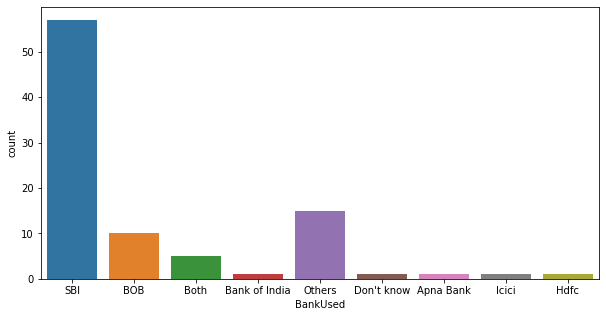

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x=bank_survey['BankUsed'])

In [17]:
bank_survey['BankUsed'].replace({"Don't know":np.nan},inplace=True)

In [18]:
bank_survey['BankUsed'].fillna(bank_survey['BankUsed'].mode()[0],inplace=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Check duplicates</b><br>
</div>

In [19]:
bank_survey.duplicated().sum()

0

In [20]:
bank_survey['Time'] = bank_survey['Time'].apply(lambda x: x.replace('.',':'))

In [21]:
bank_survey['Time'] = pd.to_datetime(bank_survey['Time'])

In [22]:
bank_survey['Time'].dt.year.value_counts()

2019    100
Name: Time, dtype: int64

In [23]:
bank_survey['Time'].dt.month.value_counts()

4    100
Name: Time, dtype: int64

In [24]:
bank_survey.drop('Time',axis=1,inplace=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

In light of the survey being conducted in the 4th month of 2019 and considering that the time feature doesn't provide significant insights, it is proposed to drop the time-related feature from the dataset

In [27]:
bank_survey[bank_survey['HasBankAccount']=='No']

,Gender,Education,Location,Profession,Income,HasBankAccount,BankUsed,UsageStatus,QualityOfService,TechnologyUsed,...,Security_BankingTransaction,Security_Privacy,Security_PersonalInfo,CustomerService_FriendlyEnvironment,CustomerService_Feedback,CustomerService_SpecialServices,CustomerService_Satisfaction,Satisfaction_Location,Satisfaction_ATMCount,Satisfaction_EmployeesApproach
32,male,Primary,Raipur,Mechanic,0,No,Others,less than 1 years,3,3,...,3,3,3,3,3,3,3,3,3,3


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
   * Only one person with a no bank account joined the survey. It's surprising because usually, you need a bank account to give feedback on banking services, considering it is outlier we can drop the feature 'HasBankAccount'.


In [28]:
bank_survey.drop('HasBankAccount',axis=1,inplace=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
 
* In the dataset, there are two columns named 'TechAdoptionFactors' and 'UsedBankingFacilities' that capture information about the factors influencing technology adoption and the banking facilities used by customers, respectively. To enhance the analysis, we are creating individual binary features for each factor and facility. Each feature will represent whether a specific factor or facility is utilized by a customer

In [30]:
bank_survey['TechAdoptionFactors'].unique()

array(['Reduced time of transaction, cost effectiveness, Ease of use, Technology savy',
       'Reduced time of transaction, Ease of use',
       'Reduced time of transaction, Technology savy',
       'Reduced time of transaction, cost effectiveness', 'Ease of use',
       'Reduced time of transaction, cost effectiveness, Ease of use',
       'Reduced time of transaction', 'Technology savy',
       'Reduced time of transaction, Ease of use, Technology savy',
       'Ease of use, Technology savy',
       'cost effectiveness, Technology savy',
       'cost effectiveness, Ease of use',
       'cost effectiveness, Ease of use, Technology savy',
       'cost effectiveness'], dtype=object)

In [31]:
bank_survey['UsedBankingFacilities'].unique()

array(['Fix deposit, ATM/Debit, saving account, online banking service, E payment, Electronic Fund Transfer',
       'ATM/Debit, saving account, online banking service, E payment, Electronic Fund Transfer',
       'ATM/Debit, saving account, online banking service',
       'saving account', 'ATM/Debit', 'ATM/Debit, saving account',
       'Fix deposit, ATM/Debit, saving account, online banking service, E payment',
       'ATM/Debit, E payment',
       'ATM/Debit, saving account, online banking service, Electronic Fund Transfer',
       'ATM/Debit, online banking service, E payment, Electronic Fund Transfer',
       'ATM/Debit, saving account, online banking service, E payment',
       'ATM/Debit, online banking service',
       'Fix deposit, ATM/Debit, online banking service, E payment',
       'ATM/Debit, online banking service, E payment',
       'Fix deposit, ATM/Debit',
       'ATM/Debit, E payment, Electronic Fund Transfer',
       'online banking service', 'E payment',
       'Fi

In [32]:
#create features for factors promote to use new techniques
unique_factors = list(bank_survey['TechAdoptionFactors'].unique())

factors = []

for i in range(len(unique_factors)):
    for j in unique_factors[i].split(', '):
        factors.append(j.strip())
        
factors = set(factors)

bank_survey['TechAdoptionFactors'] = bank_survey['TechAdoptionFactors'].apply(lambda x:x.split(', '))

for fact in factors:
    bank_survey['factor_'+fact.replace(' ','_')] = bank_survey['TechAdoptionFactors'].apply(lambda x:1 if fact in x else 0)
    
bank_survey.drop(['TechAdoptionFactors'],axis=1,inplace=True)

In [33]:
#create feature for banking facilities being used by users
unique_facilities = list(bank_survey['UsedBankingFacilities'].unique())

facilities = []

for i in range(len(unique_facilities)):
    for j in unique_facilities[i].split(', '):
        facilities.append(j.strip())
        
facilities = set(facilities)

bank_survey['UsedBankingFacilities'] = bank_survey['UsedBankingFacilities'].apply(lambda x:x.split(', '))

for fac in facilities:
    bank_survey['facility_'+fac.replace(' ','_')] = bank_survey['UsedBankingFacilities'].apply(lambda x:1 if fac in x else 0)
    
bank_survey.drop(['UsedBankingFacilities'],axis=1,inplace=True)

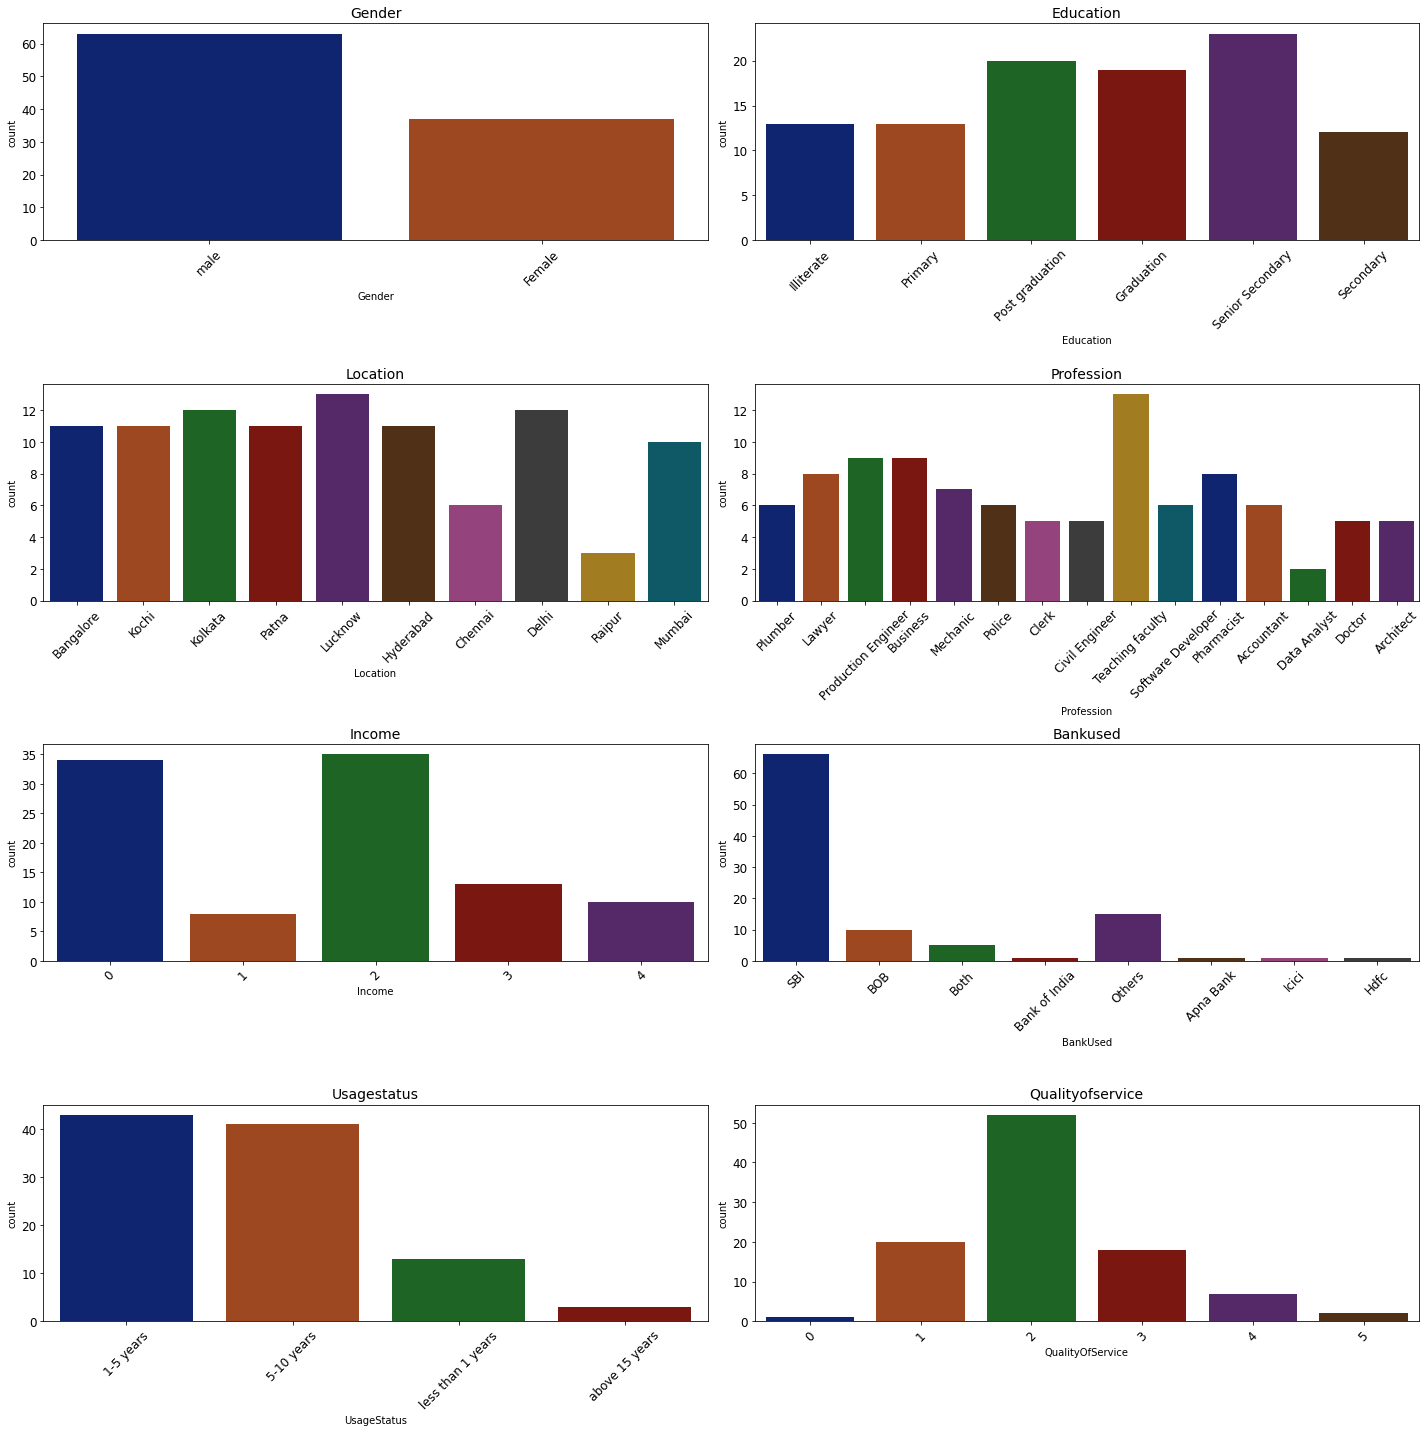

In [52]:
plt.figure(figsize=(20,20))
pltnum = 1
for col in bank_survey.columns[:8]:
    if pltnum <= 8:
        ax1 = plt.subplot(4,2,pltnum)
        sns.countplot(data=bank_survey,x=col,palette='dark')
        plt.xticks(fontsize=12, rotation=45)
        plt.yticks(fontsize=12)
        plt.title(col.title(),fontsize=14)
    pltnum+=1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

* Most of the people in the survey who shared their opinions were 63% men and 37% women.

* People from Chennai and Raipur didn't take part in the survey as much.

* Teachers joined in a lot, but not many data analysts took part.

* They divided income into groups from 0 to 4.

* Many people who use banking services have been doing so for 1 to 10 years.

* People rated service quality from 0 to 5, and most (52%) gave it a 2, which is not great.

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📃 &nbsp;<b>Demography Primary data</b><br>
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>How does the data look like?</b><br>
</div>

In [43]:
demography_data.head()

,First Name,Last Name,Gender,Age,Phone,Education,Occupation,Marital Status,Number of Children,Address,...,YojanaCardInsurance,YojanaCardUnmetNeedsHealthExpenses,YojanaCardUnmetNeedsChildrensEducation,YojanaCardUnmetNeedsMarriageSupport,YojanaCardUnmetNeedsBusinessSupport,YojanaCardUnmetNeedsNone,YojanaCardUnmetNeedsOther,YojanaCardInterestInPayingForYojanaCard,YojanaCardPriceComfortableToAvailYojanaCard,YojanaCardAcceptanceOfFreeYojanaCard
0,Cadie,Scott,Female,24,787-6371-18,Primary,Business,Single,2,Kochi,...,0,1,0,0,0,1,1,1,1,0
1,Sophia,Johnson,Female,23,541-7651-79,Illiterate,Teaching faculty,Married,1,Mumbai,...,1,1,1,1,1,1,1,1,0,1
2,Lyndon,Scott,Male,20,268-3140-69,Secondary,Pharmacist,Married,3,Patna,...,0,1,0,0,1,0,1,1,0,1
3,Isabella,Phillips,Female,18,837-4334-04,Senior Secondary,Civil Engineer,Married,2,Kochi,...,0,0,1,0,0,0,0,1,0,1
4,Ryan,Miller,Male,26,304-2544-67,Primary,Doctor,Single,2,Patna,...,0,1,0,0,0,1,1,1,1,0


In [44]:
demography_data.sample()

,First Name,Last Name,Gender,Age,Phone,Education,Occupation,Marital Status,Number of Children,Address,...,YojanaCardInsurance,YojanaCardUnmetNeedsHealthExpenses,YojanaCardUnmetNeedsChildrensEducation,YojanaCardUnmetNeedsMarriageSupport,YojanaCardUnmetNeedsBusinessSupport,YojanaCardUnmetNeedsNone,YojanaCardUnmetNeedsOther,YojanaCardInterestInPayingForYojanaCard,YojanaCardPriceComfortableToAvailYojanaCard,YojanaCardAcceptanceOfFreeYojanaCard
489,Roman,Andrews,Male,43,326-3634-88,Graduation,Pharmacist,Single,3,Bangalore,...,1,0,1,0,0,1,1,0,0,1


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

The feature names in the  demography primary dataset lack readability and ease of accessibility. Therefore, we are undertaking an initiative to modify and enhance them for improved clarity and accessibility.

In [45]:
demography_data.columns

Index(['First Name', 'Last Name', 'Gender', 'Age', 'Phone', 'Education',
       'Occupation', 'Marital Status', 'Number of Children', 'Address',
       'Caste', 'YojanaCardBenefits', 'YojanaCardBenefitsBankAccountLinked',
       'YojanaCardBenefitsUniqueQRCode',
       'YojanaCardBenefitsBookServiceWithHaqdarshaks',
       'YojanaCardBenefitsSchemeApplicationSupport',
       'YojanaCardBenefitsDigiLockerAccount',
       'YojanaCardBenefitsOffersCashbacks',
       'YojanaCardInterestedInYojanaCardStatus',
       'YojanaCardFeatureBenefitInformation',
       'YojanaCardFeatureBenefitSubsidySchemeInfo',
       'YojanaCardFeatureBenefitAccessToBankingServices',
       'YojanaCardFeatureBenefitYojanaKendra',
       'YojanaCardFeatureBenefitHQHelpline',
       'YojanaCardFeatureBenefitAssistedHQService',
       'YojanaCardFeatureBenefitDigilocker',
       'YojanaCardFeatureBenefitCashbackOffers',
       'YojanaCardFeatureBenefitBankAccountInfo',
       'YojanaCardFeatureBenefitOtherStatus', 

In [46]:
feature_shortnames2 = {
    'First Name': 'FName',
    'Last Name': 'LName',
    'Gender': 'Gender',
    'Age': 'Age',
    'Phone': 'Phone',
    'Education': 'Edu',
    'Occupation': 'Occupation',
    'Marital Status': 'MaritalStatus',
    'Number of Children': 'NumChildren',
    'Address': 'Address',
    'Caste': 'Caste',
    'YojanaCardBenefits': 'YCB',
    'YojanaCardBenefitsBankAccountLinked': 'YCB_BankLinked',
    'YojanaCardBenefitsUniqueQRCode': 'YCB_QRCode',
    'YojanaCardBenefitsBookServiceWithHaqdarshaks': 'YCB_BookService',
    'YojanaCardBenefitsSchemeApplicationSupport': 'YCB_SchemeSupport',
    'YojanaCardBenefitsDigiLockerAccount': 'YCB_DigiLocker',
    'YojanaCardBenefitsOffersCashbacks': 'YCB_Cashbacks',
    'YojanaCardInterestedInYojanaCardStatus': 'YCB_InterestStatus',
    'YojanaCardFeatureBenefitInformation': 'YCB_FeatureInfo',
    'YojanaCardFeatureBenefitSubsidySchemeInfo': 'YCB_FeatureSubsidy',
    'YojanaCardFeatureBenefitAccessToBankingServices': 'YCB_FeatureBankAccess',
    'YojanaCardFeatureBenefitYojanaKendra': 'YCB_FeatureYojanaKendra',
    'YojanaCardFeatureBenefitHQHelpline': 'YCB_FeatureHQHelpline',
    'YojanaCardFeatureBenefitAssistedHQService': 'YCB_FeatureAssistedHQ',
    'YojanaCardFeatureBenefitDigilocker': 'YCB_FeatureDigilocker',
    'YojanaCardFeatureBenefitCashbackOffers': 'YCB_FeatureCashbacks',
    'YojanaCardFeatureBenefitBankAccountInfo': 'YCB_FeatureBankInfo',
    'YojanaCardFeatureBenefitOtherStatus': 'YCB_FeatureOtherStatus',
    'YojanaCardLoanInterestStatus': 'YCB_LoanInterestStatus',
    'YojanaCardInsurance': 'YCB_Insurance',
    'YojanaCardUnmetNeedsHealthExpenses': 'YCB_UnmetHealth',
    'YojanaCardUnmetNeedsChildrensEducation': 'YCB_UnmetEducation',
    'YojanaCardUnmetNeedsMarriageSupport': 'YCB_UnmetMarriage',
    'YojanaCardUnmetNeedsBusinessSupport': 'YCB_UnmetBusiness',
    'YojanaCardUnmetNeedsNone': 'YCB_UnmetNone',
    'YojanaCardUnmetNeedsOther': 'YCB_UnmetOther',
    'YojanaCardInterestInPayingForYojanaCard': 'YCB_PayInterest',
    'YojanaCardPriceComfortableToAvailYojanaCard': 'YCB_PriceComfort',
    'YojanaCardAcceptanceOfFreeYojanaCard': 'YCB_AcceptFree'
}
demography_data.rename(columns=feature_shortnames2, inplace=True)

In [47]:
demography_data.head(2)

,FName,LName,Gender,Age,Phone,Edu,Occupation,MaritalStatus,NumChildren,Address,...,YCB_Insurance,YCB_UnmetHealth,YCB_UnmetEducation,YCB_UnmetMarriage,YCB_UnmetBusiness,YCB_UnmetNone,YCB_UnmetOther,YCB_PayInterest,YCB_PriceComfort,YCB_AcceptFree
0,Cadie,Scott,Female,24,787-6371-18,Primary,Business,Single,2,Kochi,...,0,1,0,0,0,1,1,1,1,0
1,Sophia,Johnson,Female,23,541-7651-79,Illiterate,Teaching faculty,Married,1,Mumbai,...,1,1,1,1,1,1,1,1,0,1


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>What is data type of columns?</b><br>
</div>

In [48]:
demography_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   FName                    1350 non-null   object
 1   LName                    1350 non-null   object
 2   Gender                   1350 non-null   object
 3   Age                      1350 non-null   int64 
 4   Phone                    1350 non-null   object
 5   Edu                      1350 non-null   object
 6   Occupation               1350 non-null   object
 7   MaritalStatus            1350 non-null   object
 8   NumChildren              1350 non-null   int64 
 9   Address                  1350 non-null   object
 10  Caste                    1350 non-null   object
 11  YCB                      1350 non-null   int64 
 12  YCB_BankLinked           1350 non-null   int64 
 13  YCB_QRCode               1350 non-null   int64 
 14  YCB_BookService          1350 non-null  

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
        
* Demography Primary Data
    
    - Number of Variables : 40
    - Categorical Variables : 38
    - Numeric Variables : 2

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Check & handle missing values</b><br>
</div>

In [49]:
missing_demo = demography_data.isnull().sum()
missing_demo[missing_demo>0]

Series([], dtype: int64)

* No missing values

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Check duplicates</b><br>
</div>

In [50]:
demography_data.duplicated().sum()

0

In [53]:
print(demography_data['FName'].nunique())
print(demography_data['LName'].nunique())
print(demography_data['Phone'].nunique())

206
105
1350


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
We have observed that the features FName, LName, and Phone within the dataset contain unique values. Given their uniqueness, these features may not contribute significantly to demographic analysis. Therefore, we intend to drop them

In [54]:
demography_data.drop(['FName','LName','Phone'],axis=1,inplace=True)

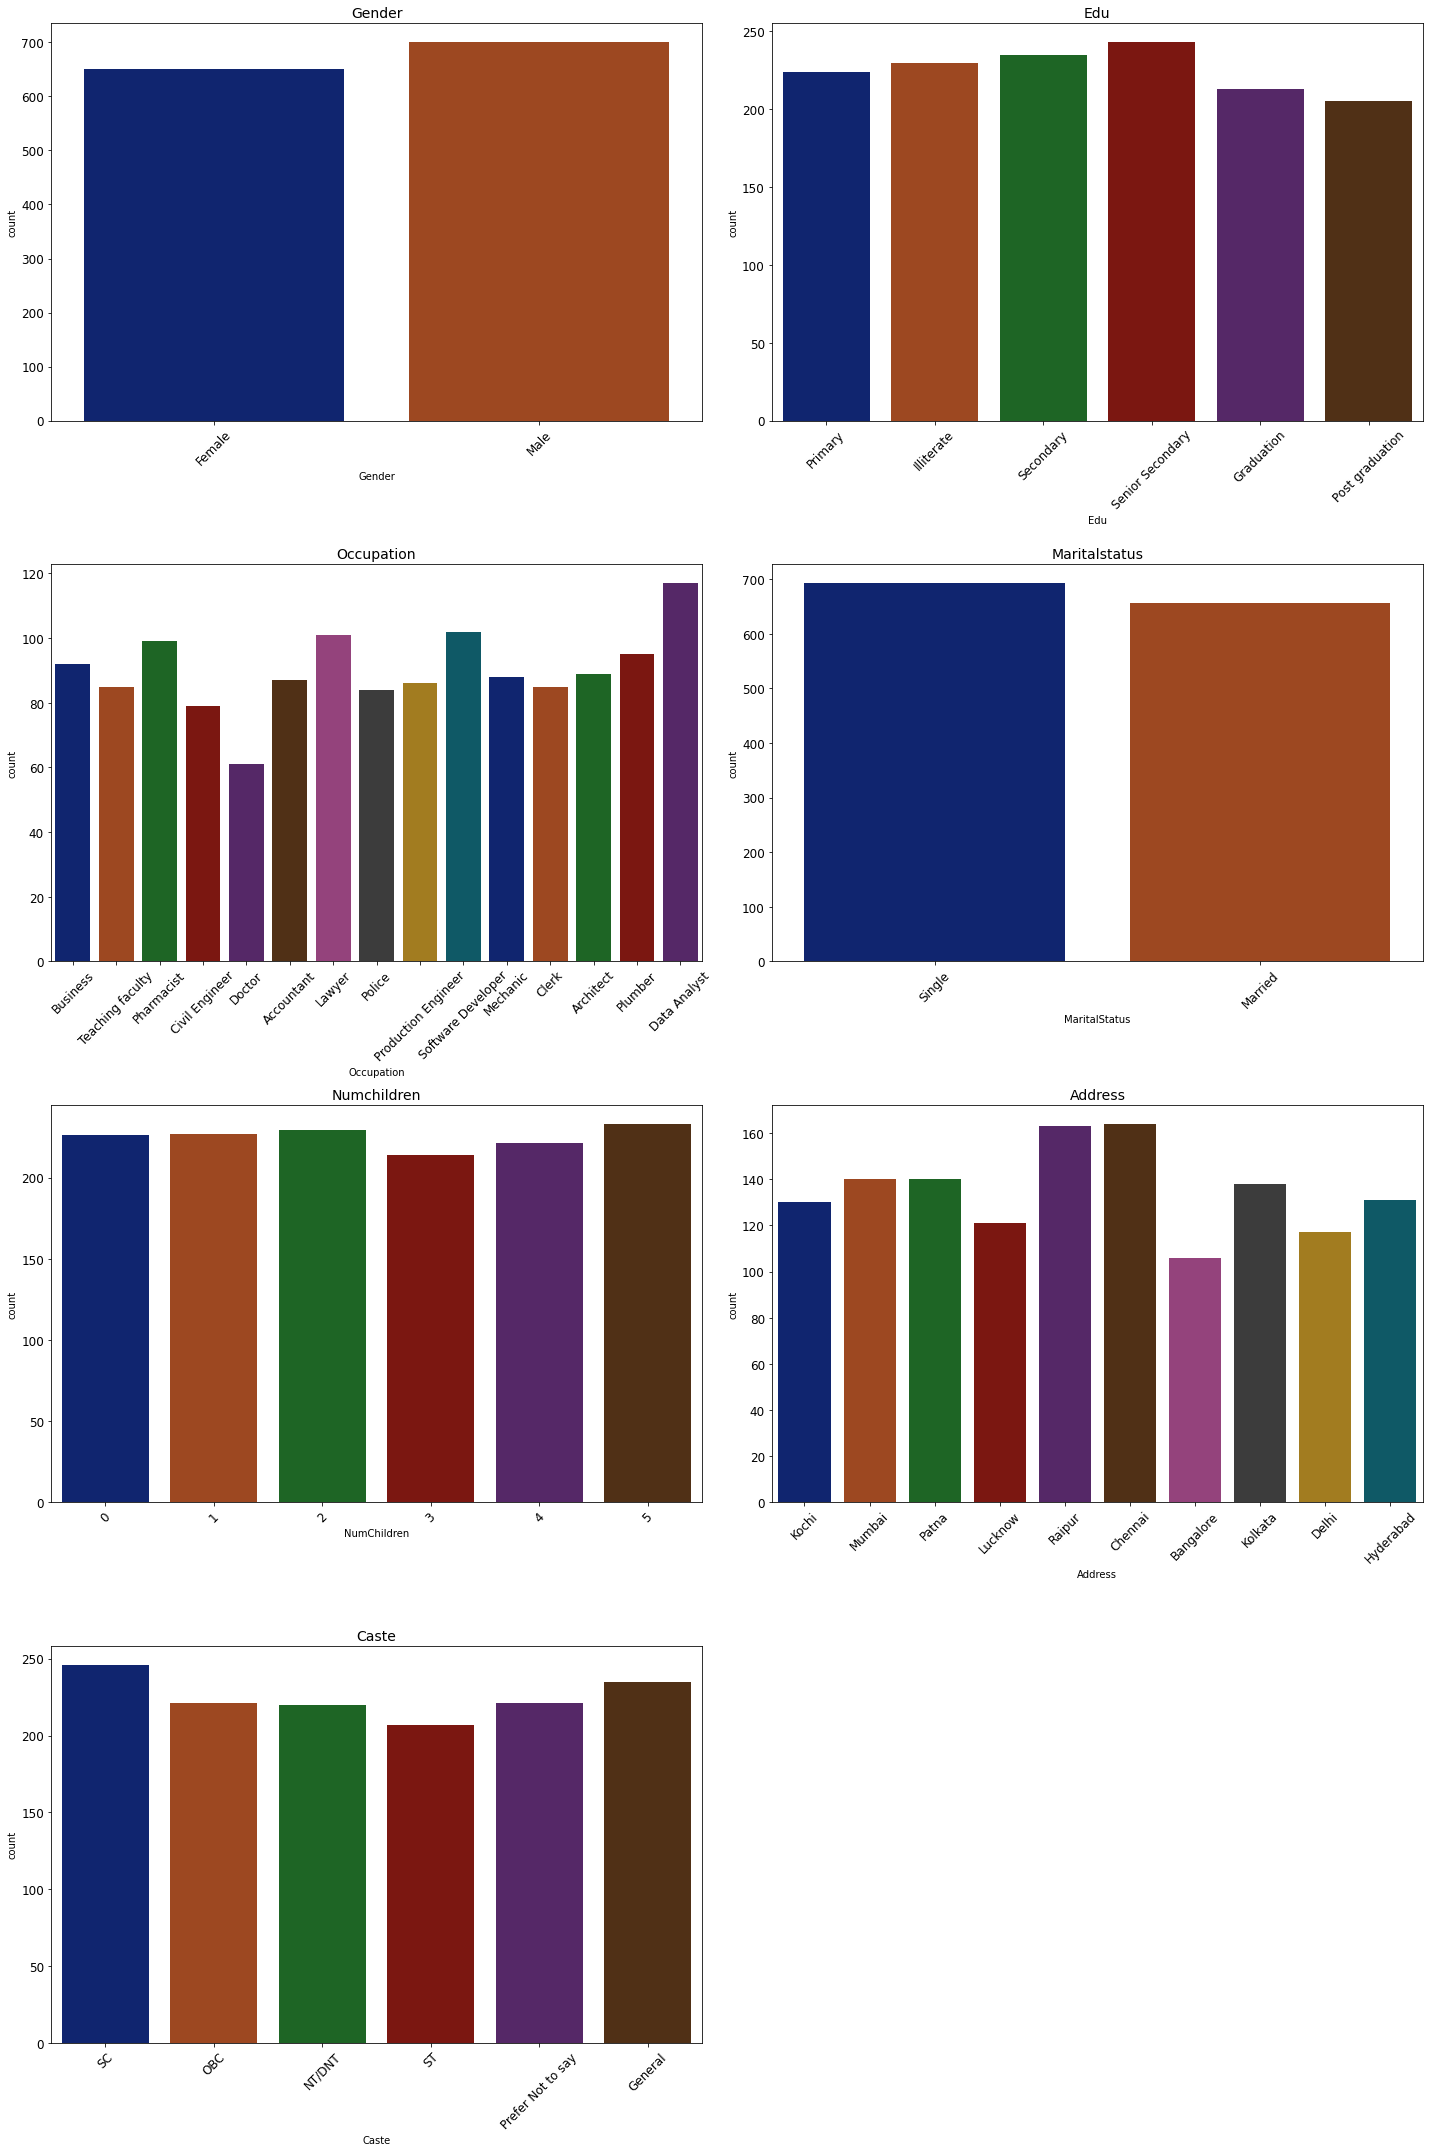

In [73]:
demographic_col = ['Gender', 'Edu', 'Occupation', 'MaritalStatus', 'NumChildren', 'Address','Caste']
plt.figure(figsize=(20,30))
pltnum = 1
for col in demographic_col:
    if pltnum <=7:
        ax1 = plt.subplot(4,2,pltnum)
        sns.countplot(data=demography_data,x=col,palette='dark')
        plt.xticks(fontsize=12,rotation=45)
        plt.yticks(fontsize=12)
        plt.title(col.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* The dataset has a relatively balanced representation of genders, with 700 individuals identified as 'Male' and 650 individuals as 'Female'
* The dataset includes individuals with varying levels of education. 'Senior Secondary', 'Secondary', and 'Illiterate' are the most common educational backgrounds.
* The dataset includes a diverse range of occupations. The most common occupations are 'Data Analyst' (117), 'Software Developer' (102), and 'Lawyer' (101). 'Doctor' has the lowest count at 61.
* The dataset reflects a distribution across multiple cities. 'Chennai' and 'Raipur' have the highest counts at 164 and 163, respectively, while 'Bangalore' has the lowest count at 106.
* Overall dataset looks balanced

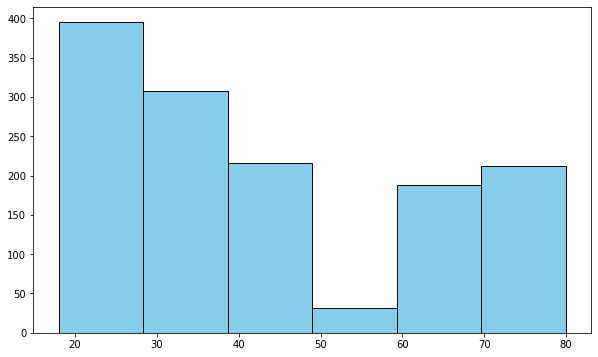

In [84]:
plt.figure(figsize=(10,6))
plt.hist(demography_data['Age'],bins=6,color='skyblue',edgecolor='black')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
The frequency distribution of individuals within the dataset reveals that the highest occurrence is observed in the age range of 20 to 30. Conversely, the frequency is markedly low for individuals aged 50 to 60. Notably, there is a comparatively higher frequency observed for individuals in the age range of 60 to 80.

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📃 &nbsp;<b>Income Expenditure Demography</b><br>
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>How does the data look like?</b><br>
</div>

In [75]:
ie_demography.head()

,Gender,Age,Education,City,Job_Title,Income,Housing,Groceries,Leisure,Entertainment,Transportation,Insurance,Medical,Utilities
0,F,48,Post graduation,Kochi,Production Engineer,35675,15472,3251,2200,1102,3500,849,839,4394
1,F,18,Graduation,Mumbai,Accountant,45627,20308,1946,6561,1389,4299,1150,974,4804
2,M,25,Graduation,Patna,Plumber,25155,9343,1520,3434,1154,3604,889,826,4046
3,M,21,Graduation,Kochi,Doctor,68599,22536,4151,2182,2251,3086,604,752,3272
4,M,40,Primary,Patna,Data Analyst,65827,22669,1379,4468,1285,3947,986,1131,4170


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>What is data type of columns?</b><br>
</div>

In [76]:
ie_demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1080 non-null   object
 1   Age             1080 non-null   int64 
 2   Education       1080 non-null   object
 3   City            1080 non-null   object
 4   Job_Title       1080 non-null   object
 5   Income          1080 non-null   int64 
 6   Housing         1080 non-null   int64 
 7   Groceries       1080 non-null   int64 
 8   Leisure         1080 non-null   int64 
 9   Entertainment   1080 non-null   int64 
 10  Transportation  1080 non-null   int64 
 11  Insurance       1080 non-null   int64 
 12  Medical         1080 non-null   int64 
 13  Utilities       1080 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 118.2+ KB


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Check & handle missing values</b><br>
</div>

In [77]:
ie_demography.isnull().sum()

Gender            0
Age               0
Education         0
City              0
Job_Title         0
Income            0
Housing           0
Groceries         0
Leisure           0
Entertainment     0
Transportation    0
Insurance         0
Medical           0
Utilities         0
dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Check duplicates</b><br>
</div>

In [78]:
ie_demography.duplicated().sum()

0

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Check Outliers</b><br>
</div>

# Part 2<span style='color:purple'>|</span> Data Exploration

### <span style='color:purple'> 2.1 Descriptive Statistics </span>

### <span style='color:purple'> 2.2 Data Visualization </span>

# Part 3<span style='color:purple'>|</span> Data Analysis

### <span style='color:purple'> 3.1 Bank Offering Analysis

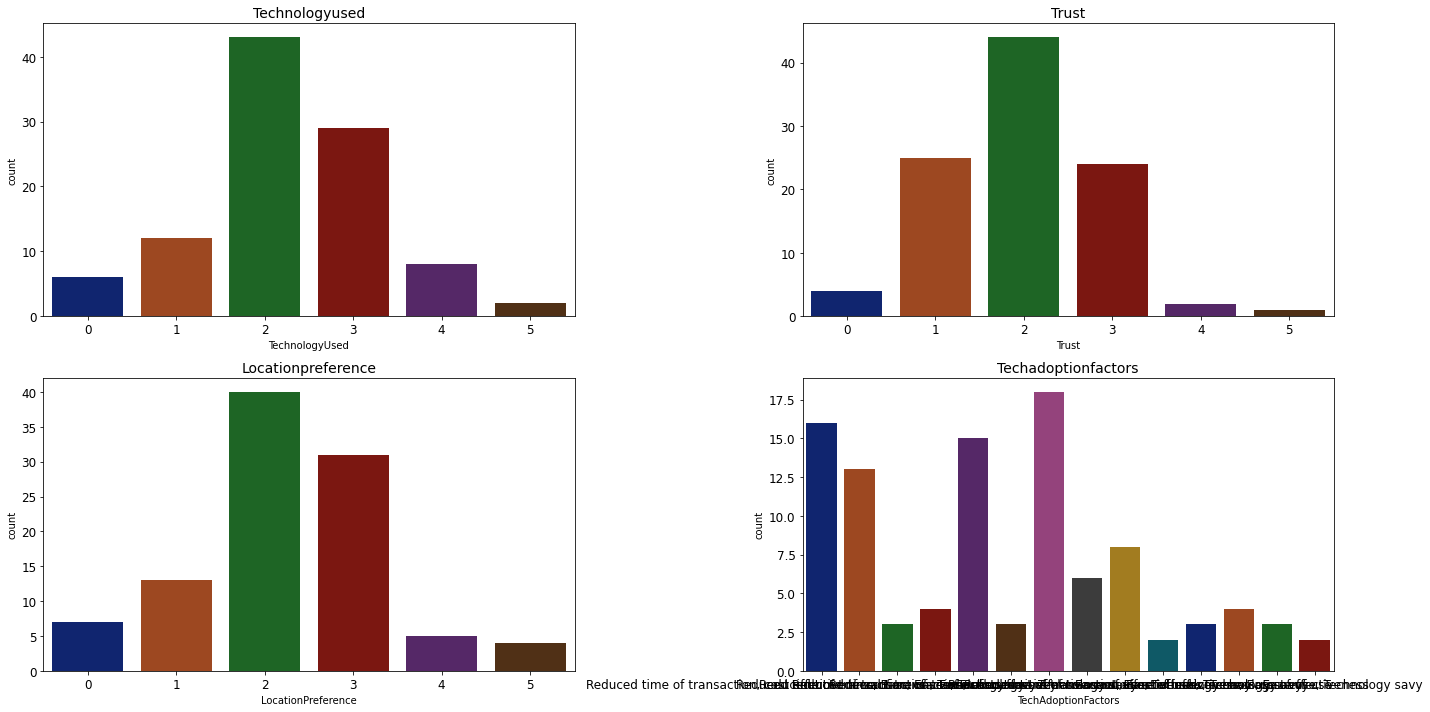

In [29]:
#Attributes of bank liked by people
plt.figure(figsize=(20,10))
pltnum = 1
for col in bank_survey.columns[8:12]:
    if pltnum <=5:
        ax1 = plt.subplot(2,2,pltnum)
        sns.countplot(data=bank_survey,x=col,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* The quality of service, technology use, trust, and location are attributes that are rated on a scale from 0 to 5
* Overall, for each attribute, the middle ratings (2 and 3) received the most support, indicating a neutral to moderately positive sentiment. The extreme ratings (0 and 5) generally received less support.

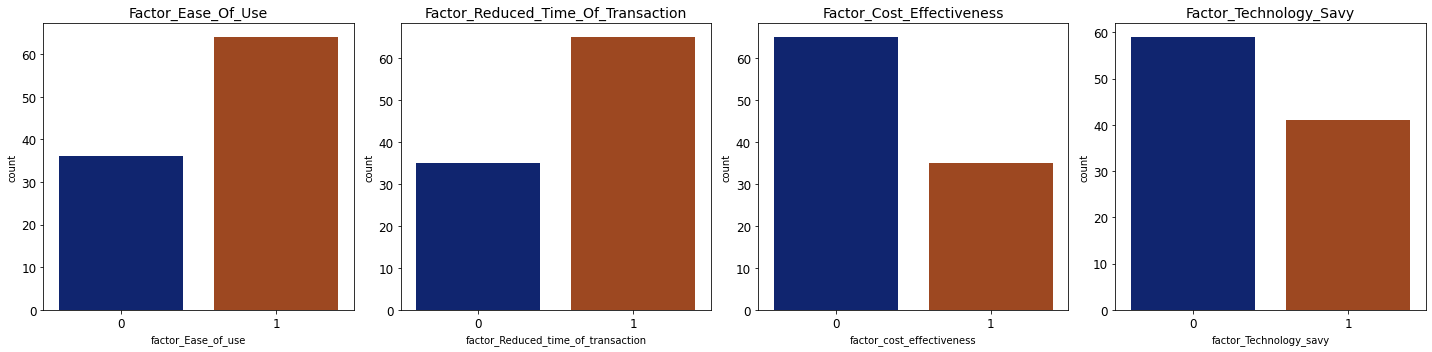

In [34]:
factors =['factor_Ease_of_use','factor_Reduced_time_of_transaction', 'factor_cost_effectiveness','factor_Technology_savy']

plt.figure(figsize=(20,5))
pltnum = 1

for fact in factors:
    if pltnum <= 4:
        ax1 = plt.subplot(1,4,pltnum)
        sns.countplot(data=bank_survey,x=fact,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(fact.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Ease of Use: 64% of respondents indicated that the ease of use is a significant factor influencing their adoption of new banking techniques.

* Reduce Time of Transaction: 65% of respondents expressed that the reduction in transaction time is a key motivator for embracing new banking techniques.

* Cost Effectiveness: 65% of respondents consider cost effectiveness as a critical factor driving their inclination towards adopting new banking methods.

* Technology Savvy: 59% of respondents stated that being technology-savvy plays a crucial role in their decision to adopt new banking techniques.

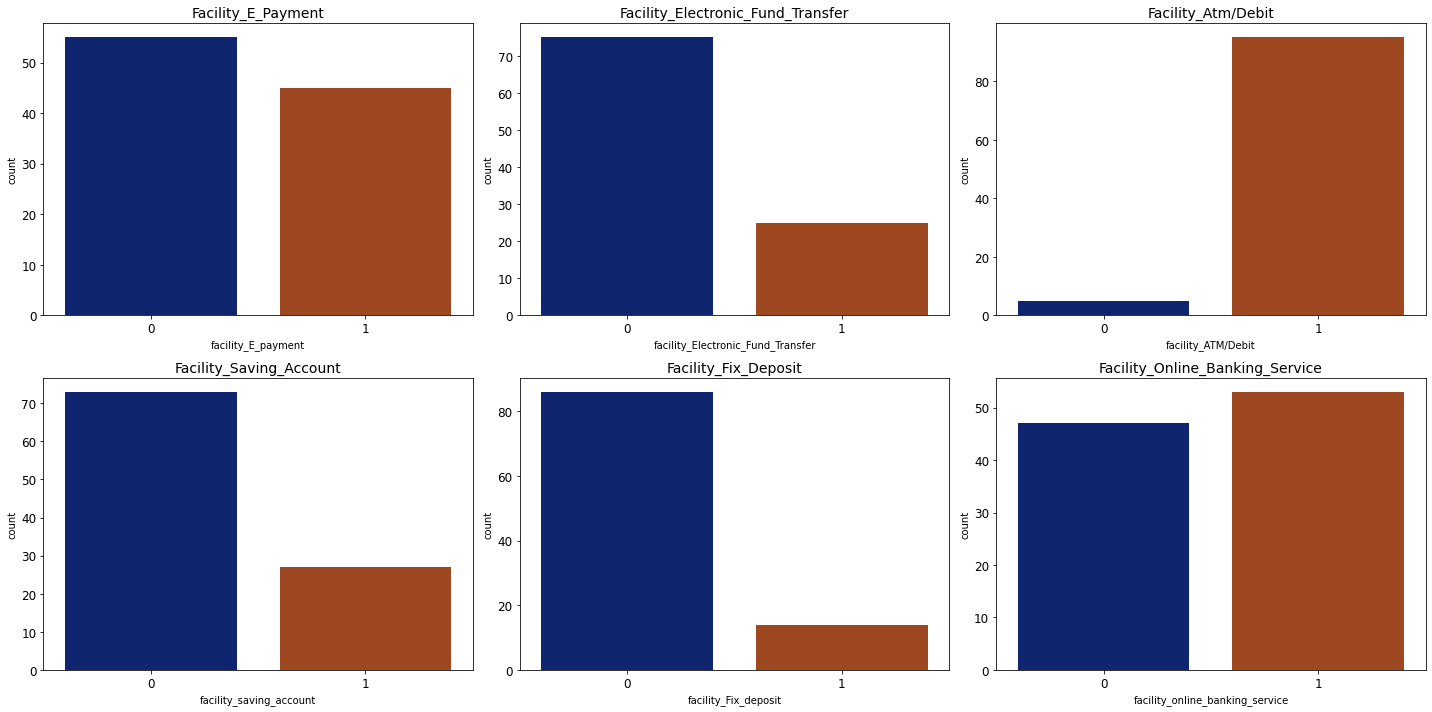

In [35]:
facilities = ['facility_E_payment', 'facility_Electronic_Fund_Transfer', 'facility_ATM/Debit','facility_saving_account',
              'facility_Fix_deposit','facility_online_banking_service']

plt.figure(figsize=(20,10))
pltnum = 1

for fac in facilities:
    if pltnum <= 6:
        ax1 = plt.subplot(2,3,pltnum)
        sns.countplot(data=bank_survey,x=fac,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(fac.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* The high percentage of users utilizing ATM/Debit cards suggests that this facility is widely accepted and preferred.
* Online banking and E Payments are also reasonably popular among users.
* Electronic Fund Transfer has a lower adoption rate compared to other facilities.
* Fixed Deposits have the lowest adoption rate among the mentioned facilities.

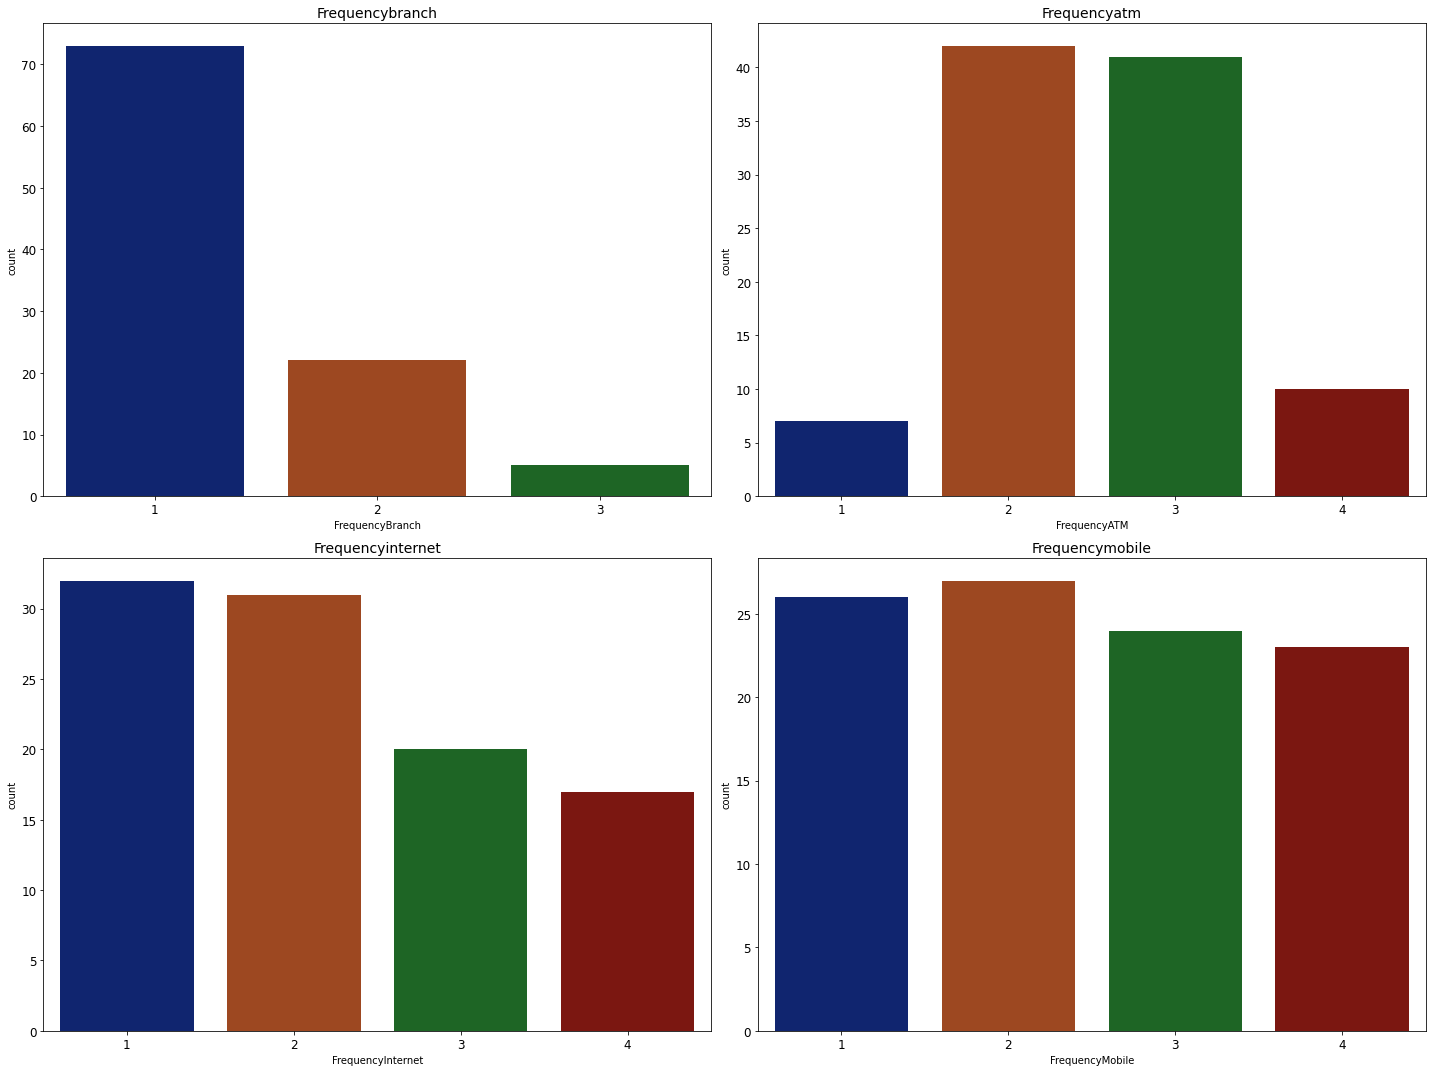

In [36]:
# Monthly frequency of use of facilities like Branch, ATM, Internet Banking, Mobile Banking 
frequency =['FrequencyBranch','FrequencyATM', 'FrequencyInternet', 'FrequencyMobile']

plt.figure(figsize=(20,15))
pltnum = 1

for freq in frequency:
    if pltnum <= 4:
        ax1 = plt.subplot(2,2,pltnum)
        sns.countplot(data=bank_survey,x=freq,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(freq.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

* Branch Service: Majority of users utilize the branch service once a month, with fewer users using it twice or thrice monthly.
* ATM Service: The usage is spread across different frequencies, with a significant number of users utilizing the ATM service either twice or thrice a month.
* Internet Banking: Users mostly engage in internet banking once or twice a month, with fewer users using it thrice or four times monthly.
* Mobile Banking: Usage is distributed across different frequencies, with a significant number of users using mobile banking twice a month. The other frequencies also have substantial user counts.

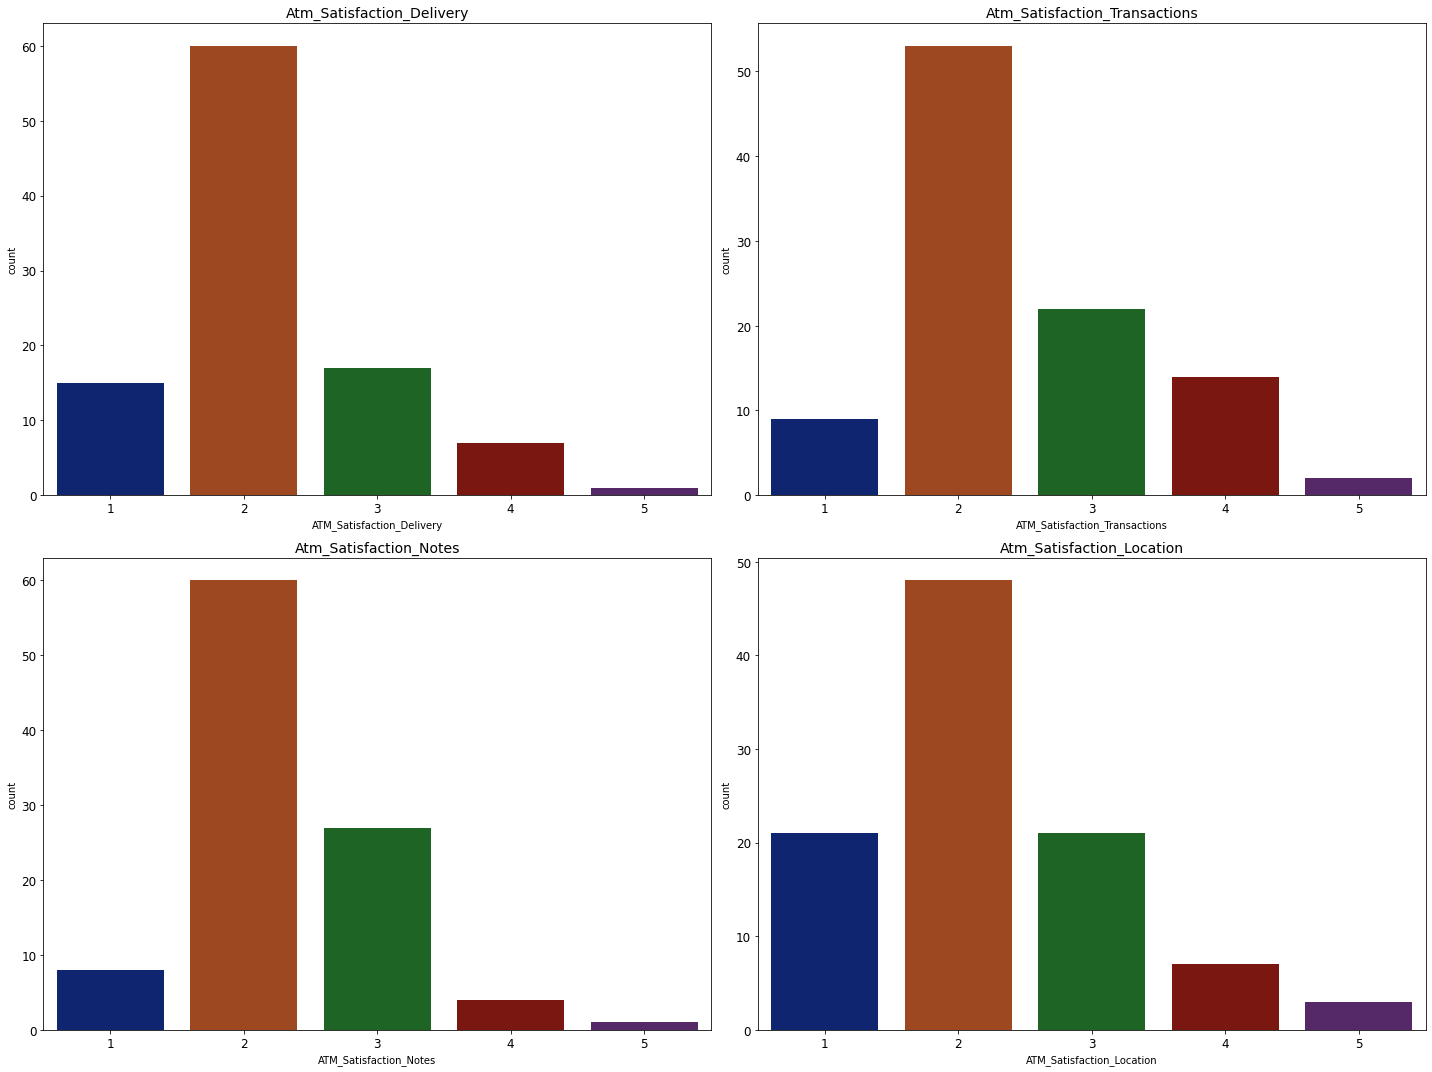

In [37]:
#user satisfaction about ATM service
atm = ['ATM_Satisfaction_Delivery', 'ATM_Satisfaction_Transactions','ATM_Satisfaction_Notes', 'ATM_Satisfaction_Location']

plt.figure(figsize=(20,15))
pltnum = 1

for i in atm:
    if pltnum <= 4:
        ax1 = plt.subplot(2,2,pltnum)
        sns.countplot(data=bank_survey,x=i,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(i.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Users express relatively low satisfaction with the delivery aspect, as the majority (60 votes) provided a rating of 2. Higher ratings (4 and 5) have very few votes, suggesting dissatisfaction in terms of delivery.
* Ratings for transactions are more evenly distributed, with the highest number of votes for rating 2, followed by ratings 3 and 4. Users appear to have mixed satisfaction regarding transaction-related services.
* Similar to the delivery aspect, the majority of users (60 votes) gave a relatively low rating of 2 for the notes-related services. Higher ratings (4 and 5) have very few votes, indicating lower satisfaction with notes-related services.
* Ratings for the location-related services are more evenly distributed across different ratings. There is a higher number of votes for ratings 2 and 3, suggesting mixed satisfaction with the physical location of ATMs.

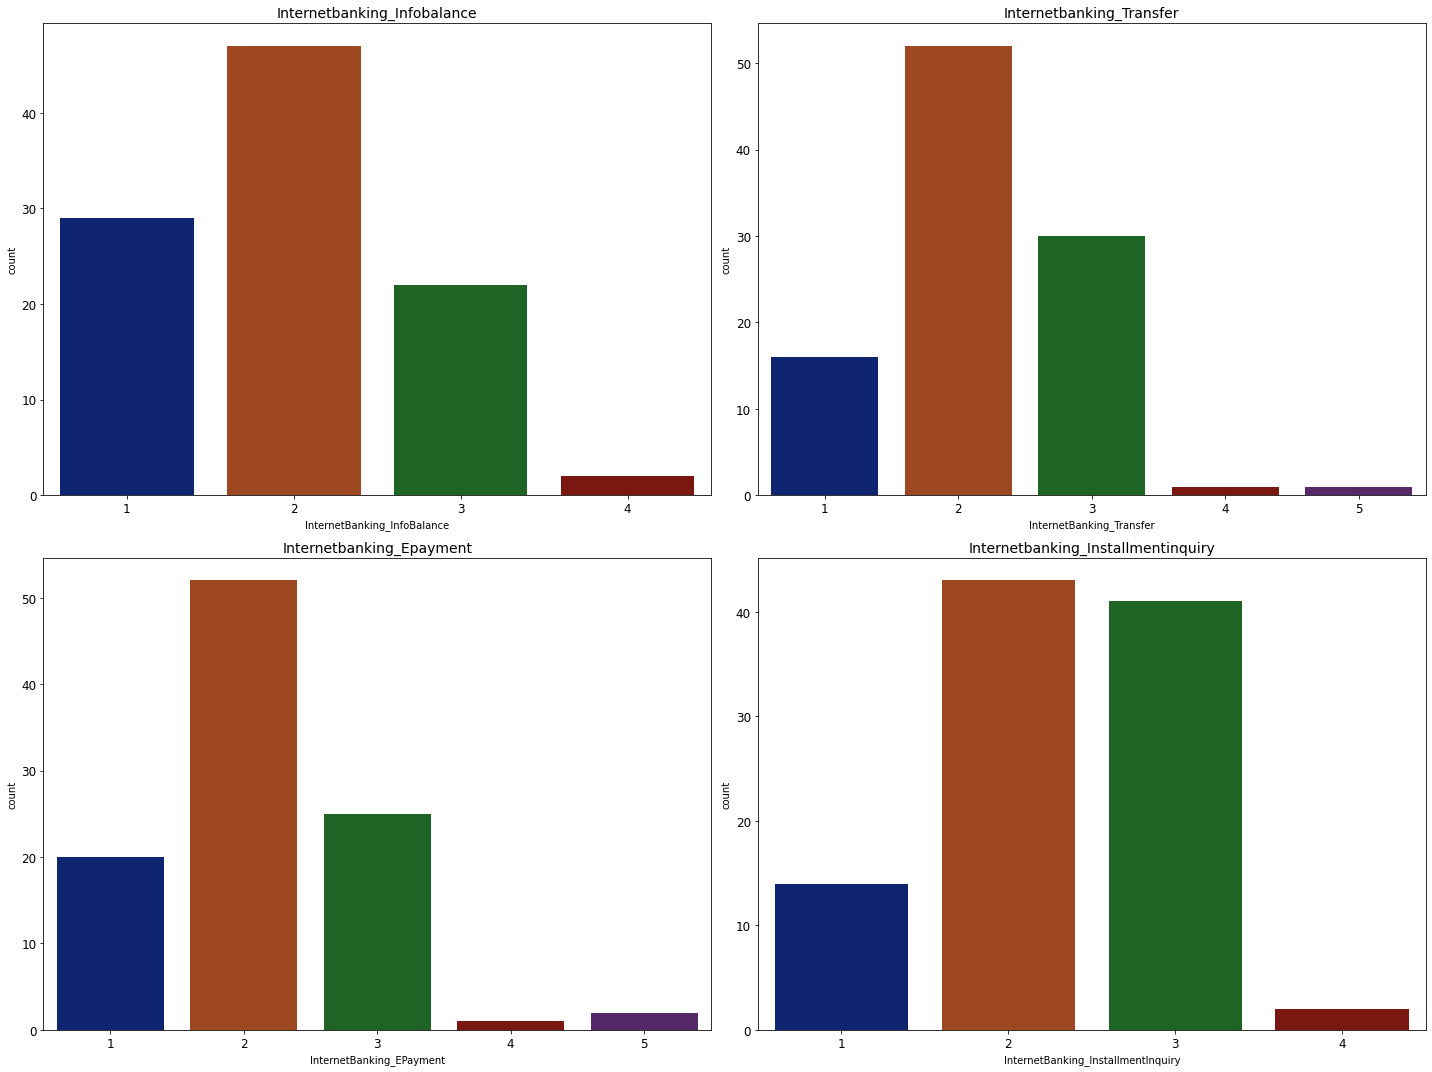

In [38]:
#ratings to Internet banking services
IB = ['InternetBanking_InfoBalance', 'InternetBanking_Transfer','InternetBanking_EPayment',
      'InternetBanking_InstallmentInquiry']
plt.figure(figsize=(20,15))
pltnum = 1

for i in IB:
    if pltnum <= 4:
        ax1 = plt.subplot(2,2,pltnum)
        sns.countplot(data=bank_survey,x=i,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(i.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

* The most common rating for all services is 2, suggesting a moderate level of satisfaction for the majority of users.
* There are varying degrees of dissatisfaction expressed by votes for ratings 1 and 3 across all services.
* There is room for improvement, particularly in addressing areas that lead to lower ratings (1 and 3).
* The lack of votes for the highest rating (5) in Transfer and EPayment services suggests potential opportunities for enhancing user experience and satisfaction in these areas.

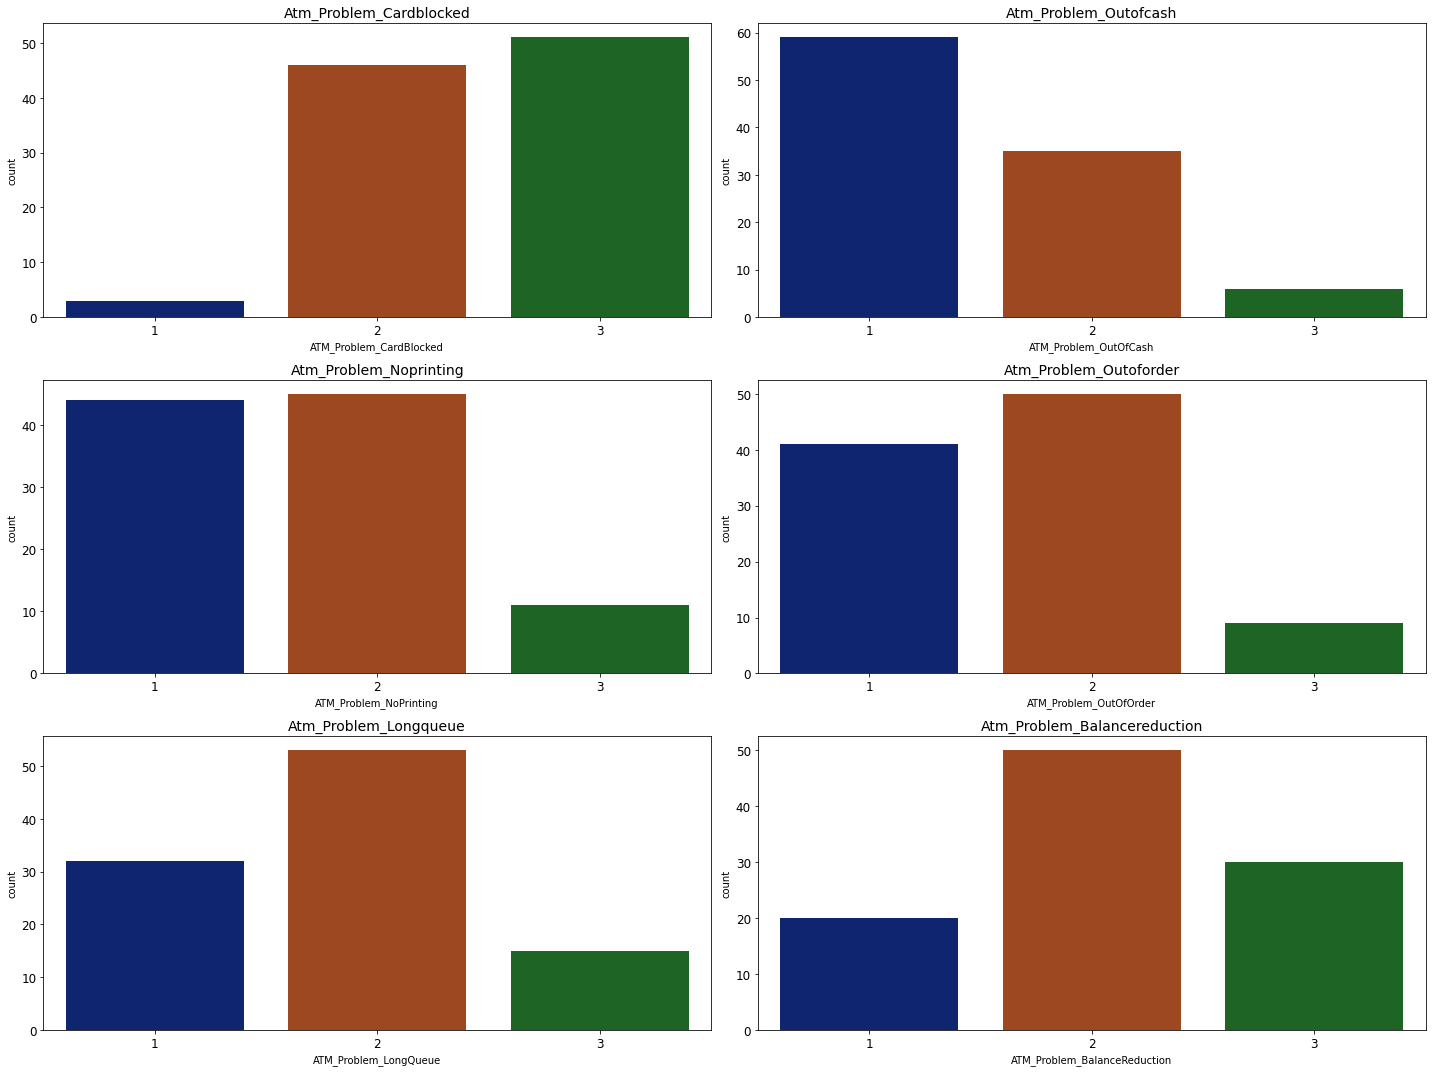

In [39]:
# problems related to ATM service faced by users
problems = ['ATM_Problem_CardBlocked', 'ATM_Problem_OutOfCash','ATM_Problem_NoPrinting', 'ATM_Problem_OutOfOrder',
       'ATM_Problem_LongQueue', 'ATM_Problem_BalanceReduction']

plt.figure(figsize=(20,15))
pltnum = 1

for i in problems:
    if pltnum <= 6:
        ax1 = plt.subplot(3,2,pltnum)
        sns.countplot(data=bank_survey,x=i,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(i.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

* The problems of Card Blocked and Out of Cash have higher dissatisfaction ratings, with the majority of users expressing dissatisfaction (ratings 2 and 3).
* Other problems such as No Printing, Out of Order, Long Queue, and Balance Reduction have mixed opinions, with users expressing varying degrees of satisfaction and dissatisfaction.

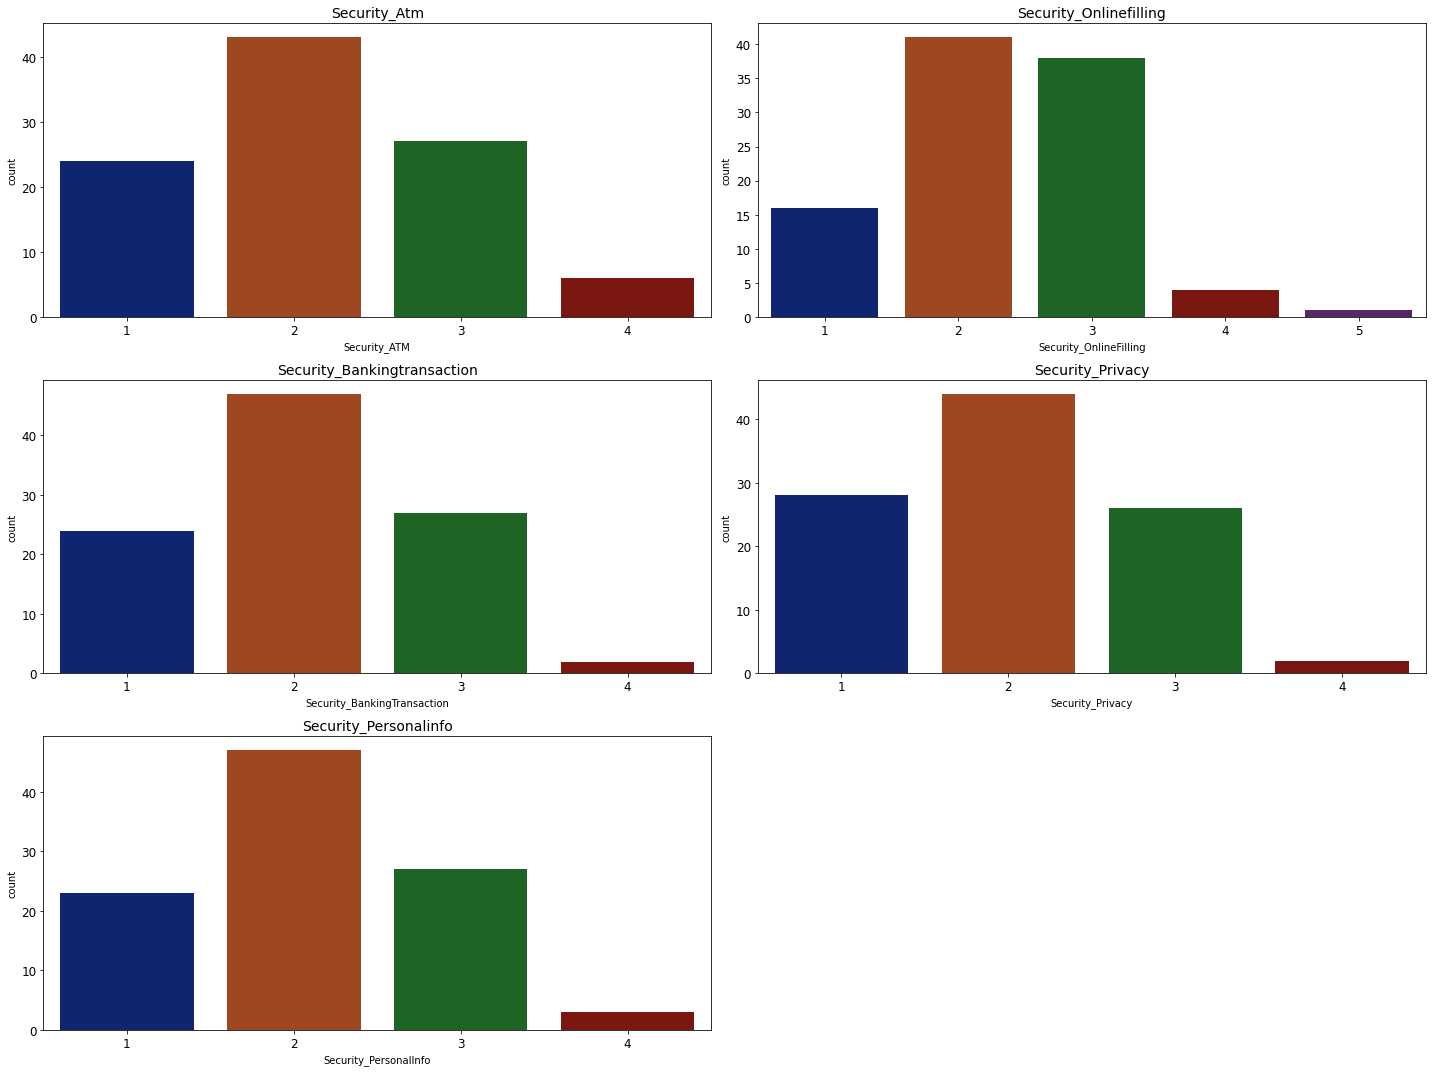

In [40]:
#security provided by bank in facilities
security = ['Security_ATM','Security_OnlineFilling', 'Security_BankingTransaction','Security_Privacy',
            'Security_PersonalInfo']

plt.figure(figsize=(20,15))
pltnum = 1

for i in security:
    if pltnum <= 5:
        ax1 = plt.subplot(3,2,pltnum)
        sns.countplot(data=bank_survey,x=i,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(i.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Online form filling receives higher satisfaction ratings compared to other security aspects.
* The security of ATMs, banking transactions, privacy, and personal information has mixed satisfaction levels, with a notable number of users expressing dissatisfaction.
* Improvements in security measures for ATMs, banking transactions, and the protection of personal information may enhance user satisfaction.

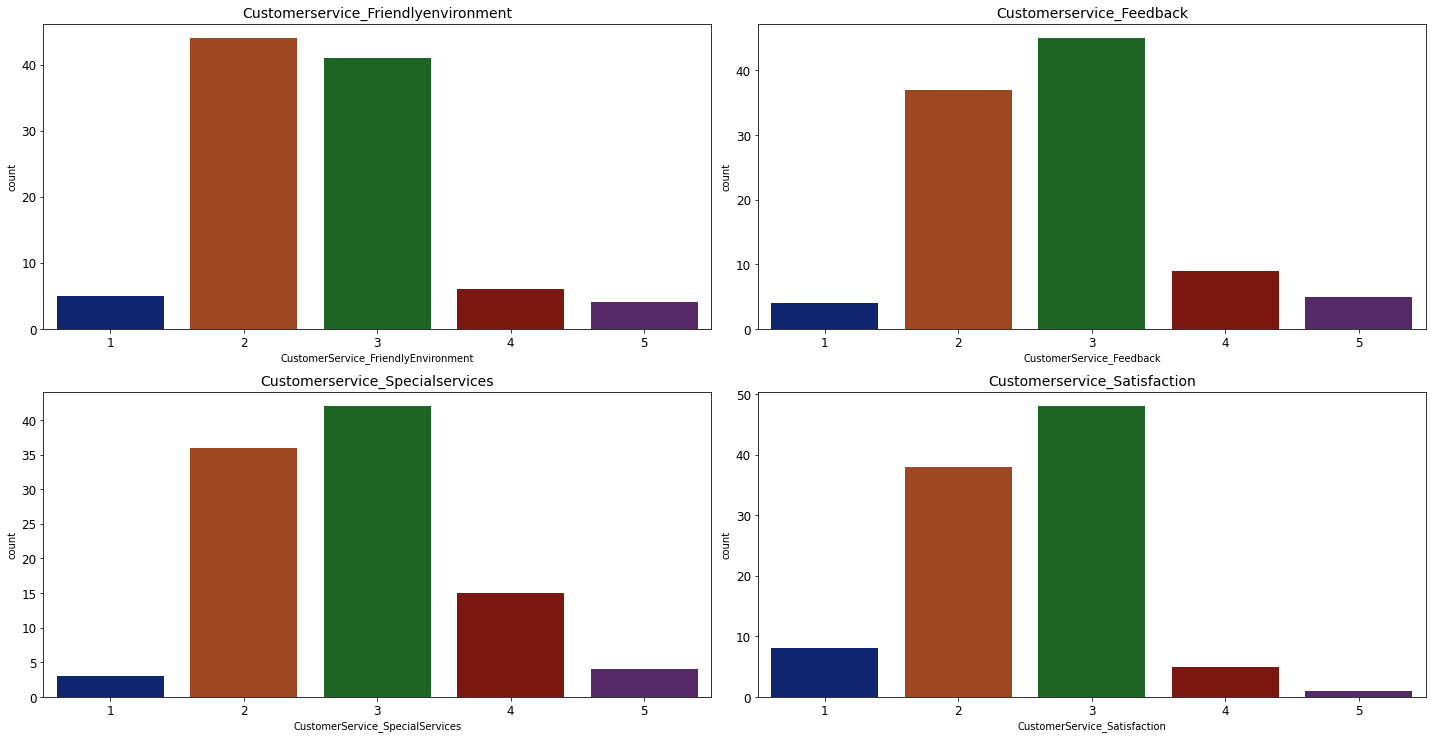

In [41]:
#customer service provided by bank
cust = ['CustomerService_FriendlyEnvironment', 'CustomerService_Feedback',
       'CustomerService_SpecialServices', 'CustomerService_Satisfaction']
plt.figure(figsize=(20,15))
pltnum = 1

for i in cust:
    if pltnum <= 4:
        ax1 = plt.subplot(3,2,pltnum)
        sns.countplot(data=bank_survey,x=i,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(i.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* The friendly environment and overall satisfaction with customer service receive higher satisfaction ratings.
* Feedback and special services have mixed satisfaction levels, with a notable number of users expressing dissatisfaction.
* Improvements in feedback mechanisms and special services may enhance overall customer service satisfaction.

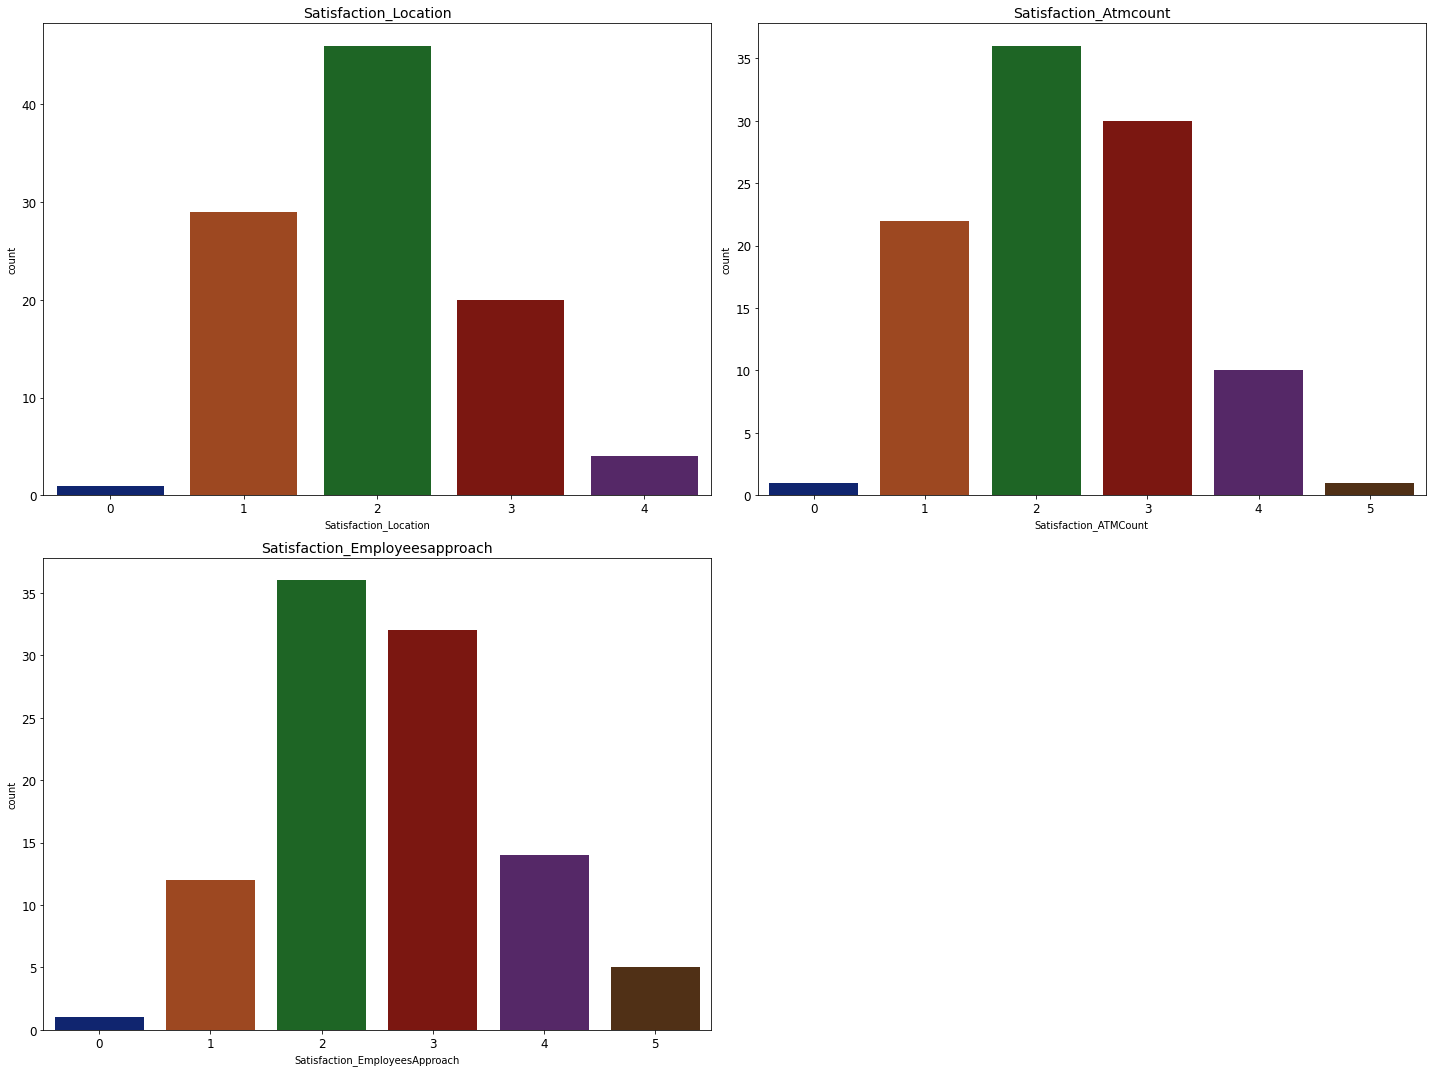

In [42]:
#Satisfaction rate with services
sat = ['Satisfaction_Location', 'Satisfaction_ATMCount','Satisfaction_EmployeesApproach']

plt.figure(figsize=(20,15))
pltnum = 1

for i in sat:
    if pltnum <= 3:
        ax1 = plt.subplot(2,2,pltnum)
        sns.countplot(data=bank_survey,x=i,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(i.title(),fontsize=14)
    pltnum += 1
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Users generally express moderate satisfaction with the location of services and the count of ATMs.
* Satisfaction with employees' approach receives higher satisfaction ratings.
* There is a notable number of users expressing dissatisfaction with ratings 1 and 3 for various services.

### <span style='color:purple'> 3.2 Matching Demographic Needs

### <span style='color:purple'> 3.3 Recommendation

# Part 4<span style='color:purple'>|</span> Data Visualization and Reporting

### <span style='color:purple'> 4.1 Data Visualization

### <span style='color:purple'> 4.2 Report

# Part 5<span style='color:purple'>|</span> Conclusion and Future Steps

### <span style='color:purple'> 5.1 Conclusion

### <span style='color:purple'> 5.2 Future Steps